# MACHINE LEARNING PROGRAMMING ASSIGNMENT 2

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import random
import time

#### Reads file into numpy array

In [66]:
def get_data(path):
    '''This function returns csv file as a numpy matrix.'''
    return np.loadtxt(open(path,"r"),delimiter=",")

#### Data pre-processing

In [67]:
def process_train(X_train):
    '''This Function scales the training data though I haven't used this in my code '''
    means=np.mean(X_train,axis=0).reshape(1,np.shape(X_train)[1]) # mean across the rows ( Mean of the columns)
    std_dev=np.std(X_train,axis=0).reshape(1,np.shape(X_train)[1])
    X_train=(X_train-means)/std_dev
    return X_train,means,std_dev

def process_test(X_test,means,std_dev):
    '''This function scales the test data based on the means and std dev of training data'''
    return ((X_test-means)/std_dev)

#### Linear Regression functions

In [4]:
def get_optimal_w(X_train,Y_train,Lambda):
    '''This function calculates the optimal w'''
    L=Lambda*np.identity(X_train.shape[1])
    A=np.add(L,np.matmul(X_train.T,X_train))
    B=np.matmul(X_train.T,Y_train)
    w=np.matmul(np.linalg.inv(A),B)
    return w

def predict(X,w):
    return np.matmul(X,w)

def MSE(Y,Y_predict):
    #error=(Y-Y_predict).reshape(1,len(Y))
    #e=np.linalg.norm(error)
    #return ((e*e)/np.shape(error)[1])
    return ((Y-Y_predict).T @ (Y-Y_predict))[0,0]/Y.shape[0]   

#### Graph Plotting functions

In [46]:
def plot_graph_task1(X,Y_train,Y_test,i,title):
    '''This function plots the necessary graphs for task 1'''
    plt.figure(1,figsize=(5,5))
    lines=plt.plot(X,Y_train,X,Y_test)
    plt.setp(lines[0],color='b',linewidth=1.0,label="MSE_train")
    plt.setp(lines[1],color='g',linewidth=3.0,label="MSE_test")
    plt.xlabel("Different values of Lambda")
    plt.ylabel("Mean Square Error")
    plt.title(title[i])
    plt.legend()
    plt.grid()
    plt.show()

def plot_graph_task2(X,Y1,Y2,Y3):
    '''This function plots the necessary graphs for task 2'''
    plt.figure(1,figsize=(8,8))
    plt.ylim((0.5,2))
    lines=plt.plot(X,Y1,X,Y2,X,Y3)
    plt.setp(lines,color='b',label="Small Lambda(1)")
    plt.setp(lines[1],color='g',label="just_right_lamda(25)")
    plt.setp(lines[2],color='r',label="Too large lambda(150)")
    plt.xlabel("Number of data points")
    plt.ylabel("Mean Squared error")
    plt.title("Mean sqaured error as a function of number of data points")
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_graph_task3_2(X,Lambda,mse,i,title):
    '''This function plots the necessary graphs for task3_2'''
    plt.figure(figsize=(8,8))    
    plt.subplot(211)
    plt.plot(X,Lambda)
    plt.xlabel("iteration number")
    plt.ylabel("Lambda(alpha/beta)")
    plt.title(title[i])
    plt.show()
    
    plt.subplot(212)
    plt.plot(X,mse)
    plt.xlabel("iteration number")
    plt.ylabel("mse(test_data)")
    plt.title(title[i])
    plt.show()
    


#### Task 2 Functions

In [6]:
def get_subset(X,Y,size):
    '''This function generates a random subset of SIZE=size from X and Y'''
    index=np.random.choice(X.shape[0],size,replace=True)
    return X[index,:],Y[index,:]        

#### Task 3.1 Functions

In [20]:
def calculate_indices(n,folds=10):
    '''This function return the start and end indices of the test data for kfold cross validation'''
    start_index=0
    end_index=int(n/folds)
    test_index=[]
    current_fold=1
    while current_fold<=folds:
        test_index.append((start_index,end_index))
        start_index=end_index
        end_index=end_index+int(n/folds)
        current_fold+=1
    return test_index


def train_test_split(X,Y,test_start_index,test_end_index):
    '''This function splits the dataset into cross_validation train and cross_validation test.'''
    n=X.shape[0]
    if(test_start_index==0):
        X_test=X[test_start_index:test_end_index,:]
        Y_test=Y[test_start_index:test_end_index,:]
        
        X_train=X[test_end_index:,:]
        Y_train=Y[test_end_index:,:]
    elif(test_end_index==n):
        X_train=X[0:test_start_index,:]
        Y_train=Y[0:test_start_index,:]
        
        X_test=X[test_start_index:test_end_index,:]
        Y_test=Y[test_start_index:test_end_index,:]
    else:
        X_train1=X[0:test_start_index,:]
        Y_train1=Y[0:test_start_index,:]
        X_train2=X[test_end_index:n,:]
        Y_train2=Y[test_end_index:n,:]
        
        X_train=np.vstack((X_train1,X_train2))
        Y_train=np.vstack((Y_train1,Y_train2))
        
        X_test=X[test_start_index:test_end_index,:]
        Y_test=Y[test_start_index:test_end_index,:]
    return X_train,X_test,Y_train,Y_test

#### Task3.2 Functions

In [21]:
def calculate_alpha_new(Gamma,Mn) :
    return Gamma/(np.matmul(Mn.T,Mn)[0,0])
    

def calculate_beta_new(X_train,Y_train,Mn,Gamma):
    A=np.matmul(X_train,Mn)-Y_train
    N=X_train.shape[0]
    beta=(N-Gamma)/(np.matmul(A.T,A)[0,0])
    return beta

def calculate_Gamma(beta_old,alpha_old,X_train):
    V,U=np.linalg.eigh(beta_old*np.matmul(X_train.T,X_train))
    Gamma=0
    for val in V:
        Gamma+=val/(val+alpha_old)
    return Gamma

def calculate_Mn(beta,Sn,X_train,Y_train):
    A=beta*Sn
    B=np.matmul(X_train.T,Y_train)
    return np.matmul(A,B)

def calculate_Sn(alpha,beta,X_train):
    A=alpha*np.identity(X_train.shape[1])
    B=beta*np.matmul(X_train.T,X_train)
    return np.linalg.inv(A+B)

## Task 1: Regularisation

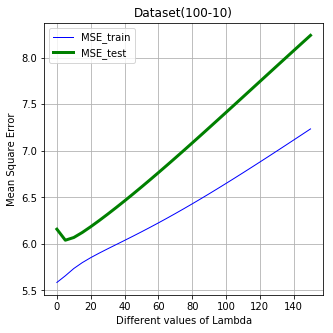

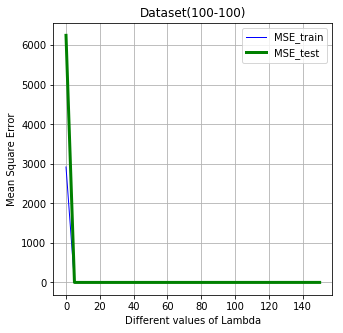

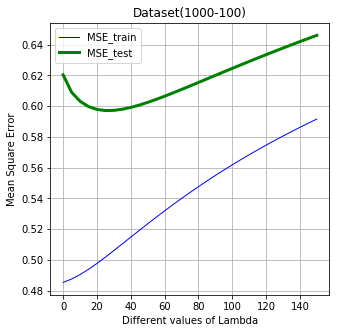

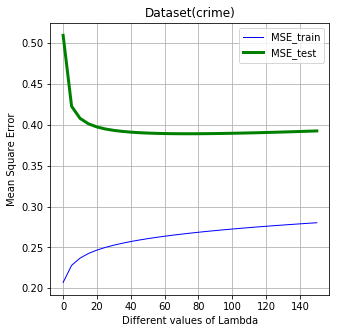

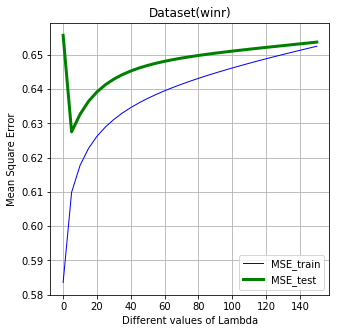

In [69]:
path_X_train=["train-100-10.csv","train-100-100.csv","train-1000-100.csv","train-crime.csv","train-wine.csv"]
path_X_test=["test-100-10.csv","test-100-100.csv","test-1000-100.csv","test-crime.csv","test-wine.csv"]
path_Y_train=["trainR-100-10.csv","trainR-100-100.csv","trainR-1000-100.csv","trainR-crime.csv","trainR-wine.csv"]
path_Y_test=["testR-100-10.csv","testR-100-100.csv","testR-1000-100.csv","testR-crime.csv","testR-wine.csv"]

title=["Dataset(100-10)","Dataset(100-100)","Dataset(1000-100)","Dataset(crime)","Dataset(winr)"]

Lambda_representative=[]
optimal_lambda=[]
for i in range(0,5):
    X_train=get_data(path_X_train[i])
    X_test=get_data(path_X_test[i])
    Y_train=get_data(path_Y_train[i])
    Y_train=Y_train.reshape(len(Y_train),1)
    Y_test=get_data(path_Y_test[i])
    Y_test=Y_test.reshape(len(Y_test),1)
    
    a=np.ones(shape=(X_train.shape[0],1)) # Adding a column of ones for the intercept form.
    b=np.ones(shape=(X_test.shape[0],1))
    X_train=np.hstack((X_train,a))
    X_test=np.hstack((X_test,b))
    
    #X_train[:,:-1],means,std=process_train(X_train[:,:-1])
    #X_test[:,:-1]=process_test(X_test[:,:-1],means,std)
    
    mse_train=[]
    mse_test=[]
    Lambda=np.arange(0,151,5)
    
    for j in range(0,len(Lambda)):
        w=get_optimal_w(X_train,Y_train,Lambda[j])
      
        Y_train_predict=predict(X_train,w)
        Y_test_predict=predict(X_test,w)
        
        mse_train.append(MSE(Y_train,Y_train_predict))
        mse_test.append(MSE(Y_test,Y_test_predict))
    
    optimal_lambda.append((Lambda[np.argmin(mse_test)],np.min(mse_test)))
    if(i==2):
        Lambda_representative.append(1)
        Lambda_representative.append(Lambda[np.argmin(mse_test)])
        Lambda_representative.append(150)
    plot_graph_task1(Lambda,mse_train,mse_test,i,title)


In [70]:
print(optimal_lambda)

[(5, 6.039466832790085), (20, 0.7206714868581048), (25, 0.5971221813467735), (75, 0.389176828077868), (5, 0.6275335711911358)]


<b>1) Comparison with the mse of the true functions</b><br>
We can see that for dataset:<br>
    (a) <u>data-100-10</u>: optimal value of Lamda comes around 5 and the mse is 6.039
    whereas the mse of the hidden function is 5.714. This is a large difference. This could be because of small number of training points might not be able to effectively approximate the true function.</br><br>
    (b) <u>data-100-100</u>: optimal value of lambda comes around 20 and the mse is 0.72
    whereas the mse of the true function is .533. The difference is approximately .2.This maybe be because in this dataset we have larger number of features and thus our regression model will be able to better predict the label corresponding to different data points.</br><br>
    (c) <u>data-1000-100</u>: optimal value of lambda comes around 25 and the mse is 0.59
    wheareas the mse of the hidden function is 0.577. The difference is approximately .02 units. This seems to be very good approximation of the hidden function.</br><br>

<b>2) Why can't the training set mse be used to select Lambda</b><br>
The training set MSE cannot be used to select Lambda. As we are increasing the value of Lambda more and more, we are focusing towards the regularisation part of the optimisation equation rather than minimising the error. Thus when we increase Lamda, focus of the optimisation on error term decreaes.In general if we find MSE for whatever range of Lambda [a,b], we will get minimum MSE on training set for Lamda=a. This clearly should not be the result. Instead we should find Lamda values from a different dataset(Cross validaton test), which will make sure we are not overfitiing towards the training data.</br><br>

<b>3) Effect of Lambda on test set error</b><br>
The general trend that we can see from above graphs is that as we increase Lamda, the mse first decreases upto a certain point( corresponding to optimal parameters) and the again starts increasing.</br><br>

<b>4) Does the effect of Lambda on test set differ for different datasets? How can you explain this?</b><br>
Yes we get different results for different datasets. It will depend on how the number of data points in the dataset and the number of features taken. Also whether the true function generating the data is linear or not, will also affect the values of Lambda.

#### Task 2

In [71]:
# Lambda_representative contains those values of lamda[too small, just right, too big]
#Lambda_representative=[0,70,150]
X_train=get_data(path_X_train[2])
X_test=get_data(path_X_test[2])
Y_train=get_data(path_Y_train[2])

Y_train=Y_train.reshape(len(Y_train),1)
Y_test=get_data(path_Y_test[2])
Y_test=Y_test.reshape(len(Y_test),1)

a=np.ones(shape=(X_train.shape[0],1))
b=np.ones(shape=(X_test.shape[0],1))
    
X_train=np.hstack((X_train,a))
X_test=np.hstack((X_test,b))

#X_train[:,:-1],means,std=process_train(X_train[:,:-1])
#X_test[:,:-1]=process_test(X_test[:,:-1],means,std)

data_points=np.arange(100,1001,50)
mse=np.zeros(shape=(3,len(data_points)))

for times in range(0,10):
    for i in range(0,len(data_points)):
        X_train_subset,Y_train_subset=get_subset(X_train,Y_train,data_points[i])

        for j in range(0,len(Lambda_representative)):
            w=get_optimal_w(X_train_subset,Y_train_subset,Lambda_representative[j])
            Y_test_predict=predict(X_test,w)
            mse[j,i]+=MSE(Y_test,Y_test_predict)
mse/=10 

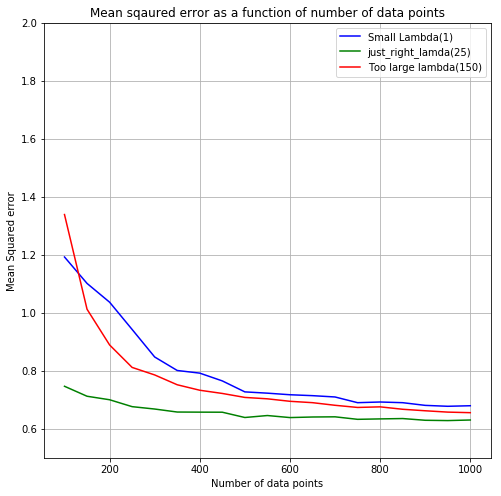

In [74]:
plot_graph_task2(data_points,mse[0,:],mse[1,:],mse[2,:])

<b>Dependence of the error on Lambda and on the number of samples </b><br>
For optimal value of Lambda, the mse is quite low as compared to "too large" and "too small lambda".However,as we increase the sample size the mse decreases for all values of Lambda. In this case, the the rate of change of mse is highest for largest lambda(150)<br>

For small training set size, the mse is quite high. This is because we are not able to learn the true function properly from small samples and hence we will make large error on test data. <br>

For large training set size, the mse is quite low for all values of Lambda.THis is because with large sample size, we are able able to approximate the true function and hence the mse reduces on the test data. 

## Task 3.1: Model Selection using Cross Validation

In [75]:
path_X_train=["train-100-10.csv","train-100-100.csv","train-1000-100.csv","train-crime.csv","train-wine.csv"]
path_X_test=["test-100-10.csv","test-100-100.csv","test-1000-100.csv","test-crime.csv","test-wine.csv"]
path_Y_train=["trainR-100-10.csv","trainR-100-100.csv","trainR-1000-100.csv","trainR-crime.csv","trainR-wine.csv"]
path_Y_test=["testR-100-10.csv","testR-100-100.csv","testR-1000-100.csv","testR-crime.csv","testR-wine.csv"]

folds=10
Lambda=np.arange(0,150,2)
mse=[]
run_time1=[]
for i in range(0,5):
    X_train=get_data(path_X_train[i])
    X_test=get_data(path_X_test[i])
    Y_train=get_data(path_Y_train[i])
    Y_train=Y_train.reshape(len(Y_train),1)
    Y_test=get_data(path_Y_test[i])
    Y_test=Y_test.reshape(len(Y_test),1)
    
    a=np.ones(shape=(X_train.shape[0],1))
    b=np.ones(shape=(X_test.shape[0],1))

    X_train=np.hstack((X_train,a))
    X_test=np.hstack((X_test,b))

    t0=time.clock()
    test_index=calculate_indices(X_train.shape[0],folds=10)
    mse_i=np.zeros(len(Lambda))
    for k in range(0,folds):
        for l in range(0,len(Lambda)):
            X_train_cv,\
            X_test_cv,\
            Y_train_cv,\
            Y_test_cv\
            =train_test_split(X_train,Y_train,test_index[k][0],test_index[k][1])
            
            #X_train_cv[:,:-1],means,std=process_train(X_train_cv[:,:-1])
            #X_test_cv[:,:-1]=process_test(X_test_cv[:,:-1],means,std)
            w=get_optimal_w(X_train_cv,Y_train_cv,Lambda[l])
            Y_test_cv_predict=predict(X_test_cv,w)
            mse_i[l]+=MSE(Y_test_cv,Y_test_cv_predict)
    mse_i/=folds
    mse.append(mse_i)
    t1=time.clock()
    run_time1.append(t1-t0)

In [76]:
lambda_optimal=[]
for i in range(0,5):
    lambda_optimal.append(Lambda[np.argmin(mse[i])])

In [77]:
# Finding error on test data.
mse1=[]
for i in range(0,5):
    X_train=get_data(path_X_train[i])
    X_test=get_data(path_X_test[i])
    Y_train=get_data(path_Y_train[i])
    Y_train=Y_train.reshape(len(Y_train),1)
    Y_test=get_data(path_Y_test[i])
    Y_test=Y_test.reshape(len(Y_test),1)
    
    a=np.ones(shape=(X_train.shape[0],1))
    b=np.ones(shape=(X_test.shape[0],1))

    X_train=np.hstack((X_train,a))
    X_test=np.hstack((X_test,b))
    
    #X_train[:,:-1],means,std=process_train(X_train[:,:-1])
    #X_test[:,:-1]=process_test(X_test[:,:-1],means,std)

    w=get_optimal_w(X_train,Y_train,lambda_optimal[i])
    Y_test_predict=predict(X_test,w)
    mse1.append(MSE(Y_test,Y_test_predict))  

In [78]:
title=["1","2","3","4","5"]
print("Title\t"+"lambda"+"\t\t\t"+"mse"+"\t\t "+"run_time")
for i in range(0,5):
    print(title[i]+"\t"+str(lambda_optimal[i])+"\t\t"+str(mse1[i])+"\t"+str(run_time1[i]))
    
print("\n\nValues in part 1")
print("Title"+"\tlambda"+"\t\t\t"+"mse")
for i in range(0,5):
    print(title[i]+"\t"+str(optimal_lambda[i][0])+"\t\t"+str(optimal_lambda[i][1]))

# title 1: 100-10
# title 2: 100-100
# title 3: 100-100
# title 4: crime
# title 5: wine

Title	lambda			mse		 run_time
1	18		6.1588343770821306	0.05168459999913466
2	18		0.7205317388694364	0.319039399999383
3	22		0.5974311514650694	0.40725639999982377
4	148		0.3924768444136736	0.3099250999985088
5	2		0.6247527416143516	0.0754666000011639


Values in part 1
Title	lambda			mse
1	5		6.039466832790085
2	20		0.7206714868581048
3	25		0.5971221813467735
4	75		0.389176828077868
5	5		0.6275335711911358


1) We can see that for the datasets 1 and 4, the optimal Lambda that is calculated using Cross Validation and directly computed through test data varies greatly.For other datasets, it is quite similar.<br>

2) However, the mse is quite similar in both cases(mse calculated using cross validation being slightly greater than the mse calculated by directly choosing lambda through test set). This variation can be explained by the fact that in the first case we are choosing value of Lambda based on test data. Therefore we will be biased towards the test set. However, in reality we never know test data. Therefore the error might be lower in part 1 but we cannot generalise it to unknown sets. The situation in 3.1 is different. Here we calculated Lambda from training set alone and hence can generalise to unknown test sets.

## Task 3.2: Bayesian Model Selection

6.697883622732256
6.043674891854604


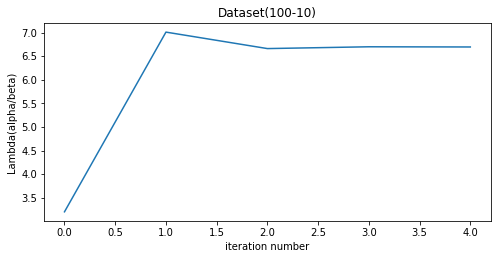

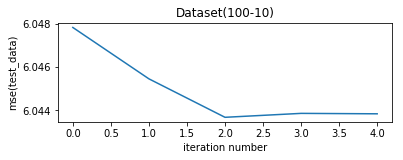

1.601947831210037
1.0748570099463925


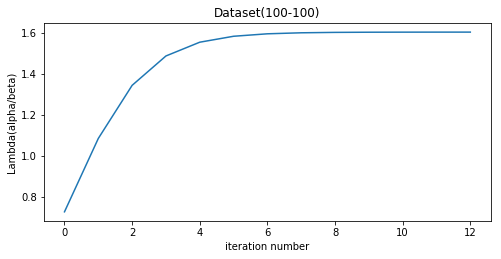

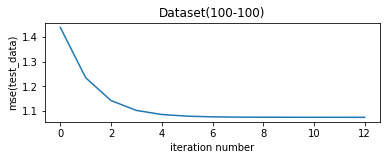

5.62268198147742
0.6081129318668672


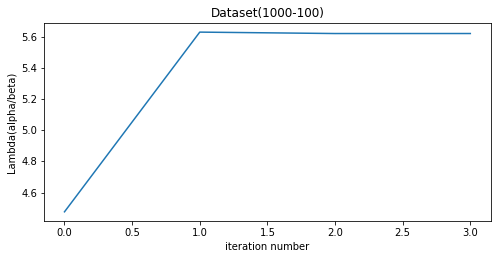

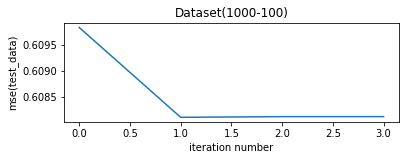

135.69798403443633
0.38917582944215656


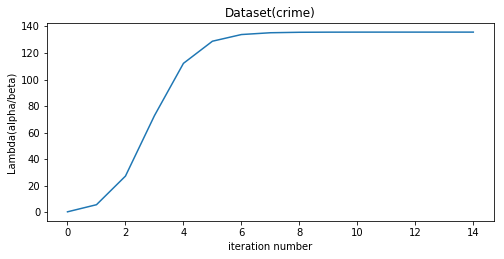

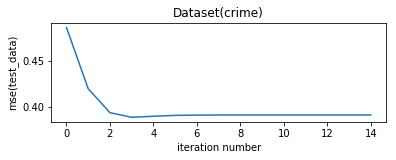

3.8504024496547267
0.6262554633141777


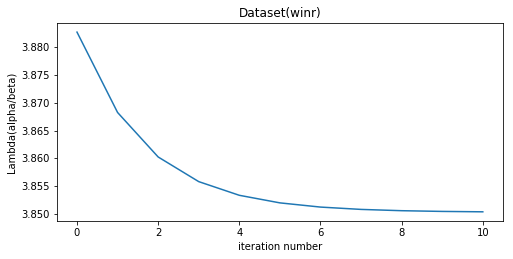

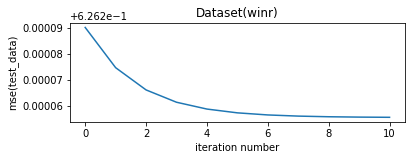

In [79]:
path_X_train=["train-100-10.csv","train-100-100.csv","train-1000-100.csv","train-crime.csv","train-wine.csv"]
path_X_test=["test-100-10.csv","test-100-100.csv","test-1000-100.csv","test-crime.csv","test-wine.csv"]
path_Y_train=["trainR-100-10.csv","trainR-100-100.csv","trainR-1000-100.csv","trainR-crime.csv","trainR-wine.csv"]
path_Y_test=["testR-100-10.csv","testR-100-100.csv","testR-1000-100.csv","testR-crime.csv","testR-wine.csv"]

title=["Dataset(100-10)","Dataset(100-100)","Dataset(1000-100)","Dataset(crime)","Dataset(winr)"]
mse2=[]
alpha_beta=[]
Lambda=[]
run_time2=[]

for i in range(0,5):
    X_train=get_data(path_X_train[i])
    X_test=get_data(path_X_test[i])
    Y_train=get_data(path_Y_train[i])
    Y_train=Y_train.reshape(len(Y_train),1)
    Y_test=get_data(path_Y_test[i])
    Y_test=Y_test.reshape(len(Y_test),1)
    
    a=np.ones(shape=(X_train.shape[0],1))
    b=np.ones(shape=(X_test.shape[0],1))

    X_train=np.hstack((X_train,a))
    X_test=np.hstack((X_test,b))
    
    #X_train[:,:-1],means,std=process_train(X_train[:,:-1])
    #X_test[:,:-1]=process_test(X_test[:,:-1],means,std)
    #lambda_old=0
    alpha_old=0
    beta_old=0
    alpha_new=np.random.uniform(1,10,1)[0] # Initial alpha value
    beta_new=np.random.uniform(1,10,1)[0]  # Initial beta value
    #lambda_new=alpha/beta
    
    mse_test_i=[]
    alpha_beta_i=[]
    lambda_i=[]
    itr=0
    t0=time.clock()
    while(abs(alpha_old-alpha_new)+abs(beta_old-beta_new)> 1e-4): 
        alpha_beta_i.append((alpha_new,beta_new))
        lambda_i.append(alpha_new/beta_new)
        
        Sn=calculate_Sn(alpha_new,beta_new,X_train)
        Mn=calculate_Mn(beta_new,Sn,X_train,Y_train)
        w=Mn
        
        Y_test_predict=predict(X_test,w)
        mse_test_i.append(MSE(Y_test,Y_test_predict))
        
        Gamma=calculate_Gamma(beta_new,alpha_new,X_train)
        alpha_old=alpha_new
        alpha_new=calculate_alpha_new(Gamma,Mn)
        beta_old=beta_new
        beta_new=calculate_beta_new(X_train,Y_train,Mn,Gamma)
        itr+=1
    t1=time.clock()
    run_time2.append(t1-t0)
    mse2.append(mse_test_i)
    alpha_beta.append(alpha_beta_i)
    Lambda.append(lambda_i)
    
    print(lambda_i[-1])
    print(np.min(mse_test_i))
    plot_graph_task3_2(np.arange(0,itr,1),lambda_i,mse_test_i,i,title)
    

In [80]:
title=["1","2","3","4","5"]
print("title\t\talpha\t\t\tbeta\t\tlambda(alpha/beta)\t\tmse\t\t\trun_time")
for i in range(0,5):
    print(title[i]+"\t"+str(alpha_beta[i][-1][0])+"\t"+str((alpha_beta[i][-1][1]))+"\t"+str(Lambda[i][-1])+"\t"+str(mse2[i][-1])+"\t"+str(run_time2[i]))

print("\n\nValues in part 1")
print("title\tlambda"+"\t\t"+"mse")
for i in range(0,5):
    print(title[i]+"\t"+str(optimal_lambda[i][0])+"\t"+str(optimal_lambda[i][1]))
# title 1: 100-10
# title 2: 100-100
# title 3: 100-100
# title 4: crime
# title 5: wine

title		alpha			beta		lambda(alpha/beta)		mse			run_time
1	1.1068955338123965	0.1652604906504575	6.697883622732256	6.04383727266122	0.0025550000009388896
2	5.217340480887385	3.2568729013768496	1.601947831210037	1.0748570099463925	0.028803400000469992
3	10.446287436779654	1.8578833857565566	5.62268198147742	0.608125518533513	0.009214199999405537
4	439.7035265262347	3.240309940158362	135.69798403443633	0.3916584568584869	0.04234059999907913
5	6.202511631291107	1.6108735937063665	3.8504024496547267	0.6262554633141777	0.003745100000742241


Values in part 1
title	lambda		mse
1	5	6.039466832790085
2	20	0.7206714868581048
3	25	0.5971221813467735
4	75	0.389176828077868
5	5	0.6275335711911358


<b> We can see that for dataset:</b><br>
1) <u>title1(100-10), title5(wine)</u>  : The lambda value calculated in part 1 and using the bayesian model selection is very similar.<br>

2) <u>title2(100-100), title3(1000-100), title(crime)</u> : The Lambda value calculated using different methods are quite different.<br>

However, in all 5 datasets, the mse calculated using both the methods is quite similar(mse using bayesian model selction being slighly greater than part1 where we directly chose lambda through test data)<br>
In part 1 we calculated optimal lambda using the test data directly, however in beyaesian model selection we are using only training data to calculate lambda. Therefore the mse will naturally be lower in case1. We can see this from the values of mse in both the cases.

## Task3.3: Comparison

In [81]:
print("Cross Validation Model Selction")
title=["1","2","3","4","5"]
print("Title\t"+"lambda"+"\t\t\t"+"mse"+"\t\t "+"run_time")
for i in range(0,5):
    print(title[i]+"\t"+str(lambda_optimal[i])+"\t\t"+str(mse1[i])+"\t"+str(run_time1[i]))

print("\n\nBayesian Model Selection")
print("title\t\talpha\t\t\tbeta\t\tlambda(alpha/beta)\t\tmse\t\t\trun_time")
for i in range(0,5):
    print(title[i]+"\t"+str(alpha_beta[i][-1][0])+"\t"+str((alpha_beta[i][-1][1]))+"\t"+str(Lambda[i][-1])+"\t"+str(mse2[i][-1])+"\t"+str(run_time2[i]))

Cross Validation Model Selction
Title	lambda			mse		 run_time
1	18		6.1588343770821306	0.05168459999913466
2	18		0.7205317388694364	0.319039399999383
3	22		0.5974311514650694	0.40725639999982377
4	148		0.3924768444136736	0.3099250999985088
5	2		0.6247527416143516	0.0754666000011639


Bayesian Model Selection
title		alpha			beta		lambda(alpha/beta)		mse			run_time
1	1.1068955338123965	0.1652604906504575	6.697883622732256	6.04383727266122	0.0025550000009388896
2	5.217340480887385	3.2568729013768496	1.601947831210037	1.0748570099463925	0.028803400000469992
3	10.446287436779654	1.8578833857565566	5.62268198147742	0.608125518533513	0.009214199999405537
4	439.7035265262347	3.240309940158362	135.69798403443633	0.3916584568584869	0.04234059999907913
5	6.202511631291107	1.6108735937063665	3.8504024496547267	0.6262554633141777	0.003745100000742241


1) <u>Runtime</u>: We can see that the run time is significantly low for all the datasets in case of bayesian model selection. This is because evidence maximisation converges quite fast as compared finding optimal hyperparameters using cross validation.<br>
2) <u>Effective Lambda and test set mse</u>: MSE is quite similar for every dataset in both the cases. However, the lambda differs significantly for dataset(100-10), dataset(100-100), dataset(1000-100).<br>

One of the reasons of this difference can be due to the way we are selecting our hyperparameters. In <i><b>Bayesian model selection</i></b>, we integrate out all the model parameters and find marginal likelihood with respect to the hyperparameters. This means bayesian model selection is based on <i>assumption of our model</i> i.e. the way we are calculating alpha and beta for the next iteration depends on the likelihood and paramter distribution. If we had some other ditributions, then the equations used to calculate the hyperparameters would be different. In contrast to this, <i><b>cross validation model selection</i></b> method does not depend on any assuption of model. Hence, it will calculate optimal hyperparameters the same way no matter what the assuption is.<br>
This means if our assuption of model is correct, then we will get approximately same value of hyperparameters using both cross validation and bayesian model selection. However, if this is not true, then cross validation method would be a much stronger tool to calculate hyperparameters.